In [16]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

---
# Aufgabe3a

Die Grundlagen der Allgemeinen Relativitätstheorie (ART) hatte Albert Einstein am 25. November 1915 der Preussischen Akademie der Wissenschaften vorgetragen.

Eine Vorhersage der ART besagt, dass Lichtstrahlen von Sternen, die sich hinter der Sonne befinden und gerade am Sonnenrand vorbei auf die Erde treffen, eine Winkelablenkung aufgrund der Raumkrümmung erfahren. Aus dieser Winkelablenkung lässt sich dann der Raumkrümmungsparameter γ bestimmen. In der Newton’schen Physik, wo der Raum nicht gekrümmt ist, hat γ den Wert 0. In der ART hat γ den Wert 1. Im Jahre 1975 wurde an 9 Tagen im National Radio Astronomy Observatory (NRAO) in Green Bank aus der Lichtablenkung der Wert von γ ermittelt. Die Werte dieser Messungen finden Sie in der Datei gamma.txt auf Ilias.

Geben Sie den relativen Fehler für den Wert von γ der 1975 erhobenen Messreihe an. Beachten Sie die Anzahl signifikanter Stellen und lassen Sie bei der Eingabe das Prozentzeichen weg.



In [38]:
table = pd.read_csv(r"../01 Modulunterlagen/SW09/gamma.txt", delim_whitespace=True)
print(table)

        Day  gamma
0   April 5  1.000
1   April 6  0.960
2   April 7  1.020
3   April 8  1.000
4   April 9  1.002
5  April 13  1.022
6  April 14  0.990
7  April 15  0.980
8  April 16  0.930


In [26]:
gamma_schnitt = table["gamma"].mean()
print(gamma_schnitt)

0.9893333333333333


In [27]:
gamma_std = table["gamma"].std()
print(gamma_std)

0.029291637031753616


In [28]:
stdfehler = gamma_std/np.sqrt(table["gamma"].size)
print(stdfehler)

0.009763879010584538


In [29]:
rel_F = stdfehler / gamma_schnitt
print(rel_F)

0.009869149943313213


In [32]:
rel_F * 100

0.9869149943313213

dass man % erhält

---
# Aufgabe3b
Nach einer Schamanen-Zeremonie mit Ayahuasca sind Sie in einem Anflug von Wahnsinn der festen Ueberzeugung, dass Sie die Wiedergeburt von Isaac Newton sind. Als erstes wollen Sie die ART widerlegen, und zwar zugunsten Ihrer Theorie mit γ=0. Wie lautet die Nullhypothese, wie die Alternativhypothese in Bezug auf den Wert des Raumkrümmungsparameters γ?

Führen Sie einen statistischen t-Test mit Hilfe des 1975 erhobenen Datensatzes durch. Geben Sie den p-Wert des Tests an, und zwar mit 4 Nachkommastellen.

$\mu_0$ = y=1 <-- dies will ich verwerfen.... <br />
$\mu_A$ = y < 1 <-- wieso?

benötigt es überhaupt einen Test wenn wir oben die Resultate haben?

In [36]:
st.t.cdf(x=table["gamma"].mean(), df=table["gamma"].size-1, loc=1, scale=table["gamma"].std()/np.sqrt(table["gamma"].size))

0.15321670790410435

---
# Aufgabe3c
Geben Sie aufgrund der in der Datei gamma.txt enthaltenen Messwerte die obere Intervallgrenze des einseitigen 96%-Vertrauensintervalls für den wahren Wert des Parameters γ an. (Mit 5 Nachkommastellen)

In [41]:
table["gamma"].mean() + st.t.ppf(0.96, df=table["gamma"].size-1)*table["gamma"].std()/(np.sqrt(table["gamma"].size))

1.008901626503232

92%, da 96% = einseitig und wir auf der anderen Seite noch 4% abziehen müssen!

In [43]:
st.t.interval(alpha=0.92, df=table["gamma"].size-1, loc=table["gamma"].mean(), scale=table["gamma"].std())

(0.9306284538236372, 1.0480382128430292)

---
# Quizfrage 06
In dem auf Ilias abgelegten zip File ist die Datei Schokolade_Nobelpreis abgelegt. Diese enthält für 22 Länder die Anzahl Nobelpreise pro 10 Millionen Einwohnern und der Schokoladenkonsum (in Kilogramm) pro Kopf enthalten. Der Korrelationskoeffizient beträgt


In [19]:
table_2 = pd.read_csv(r"../01 Modulunterlagen/SW09/Schokolade_Nobelpreis.txt", delim_whitespace=True)
print(table_2)

           Country  Nobel Laureates per 10 Million  \
0           Sweden                          30.677   
1      Switzerland                          30.125   
2           Norway                          24.947   
3          Denmark                          24.695   
4          Austria                          24.577   
5   United Kingdom                          19.315   
6          Ireland                          17.060   
7          Germany                          13.013   
8      Netherlands                          11.226   
9    United States                          10.970   
10          France                           9.473   
11         Belgium                           8.850   
12         Finland                           7.268   
13          Canada                           6.400   
14       Australia                           5.006   
15           Italy                           3.345   
16        Portugal                           1.932   
17           Japan          

In [21]:
nobel = table_2["Nobel Laureates per 10 Million"].mean()
print(nobel)

11.565863636363634


In [22]:
table_2.corr()

,Nobel Laureates per 10 Million,Chocolate consumption (kg) per capita
Nobel Laureates per 10 Million,1.00000,0.75859
Chocolate consumption (kg) per capita,0.75859,1.00000


In [2]:
werte = np.array([0,10,11])

In [4]:
werte.size

3

In [5]:
ew = np.sum(werte*(1/werte.size))

In [6]:
print(ew)

7.0


In [8]:
st.norm.cdf(1.0783)

0.8595500514601189

In [9]:
st.norm.cdf(24.5)

1.0

In [10]:
st.norm.ppf(q=0.025, loc=32.7, scale=4.15)

24.566149464158777

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from scipy.stats import norm, probplot
x = Series([24.4, 27.6, 27.8, 27.9, 28.5,
30.1, 30.3, 31.7, 32.2, 32.8,
33.3, 33.5, 34.1, 34.6, 35.8,
35.9, 36.8, 37.1, 39.2, 39.7])

In [12]:
alphak = (np.arange(1, x.size + 1) - 0.5) / x.size
print(alphak)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


In [13]:
quantile_theor = norm.ppf(q=alphak, loc=x.mean(), scale=x.std())
print(quantile_theor)

[24.53167148 26.6913278  27.89135645 28.78670336 29.53022884 30.18445468
 30.78200776 31.34273151 31.8802089  32.40478357 32.92521643 33.4497911
 33.98726849 34.54799224 35.14554532 35.79977116 36.54329664 37.43864355
 38.6386722  40.79832852]


In [14]:
quantile_empir = np.sort(x)
print(quantile_empir)

[24.4 27.6 27.8 27.9 28.5 30.1 30.3 31.7 32.2 32.8 33.3 33.5 34.1 34.6
 35.8 35.9 36.8 37.1 39.2 39.7]


((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 33.3,
         33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])),
 (4.338493299839927, 32.665000000000006, 0.9923829304670189))

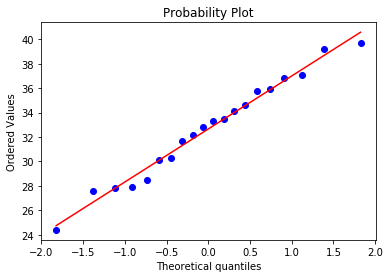

In [15]:
probplot(x, plot=plt)

In [17]:
st.norm.cdf(x=0.025)

0.509972518195238

In [18]:
st.norm.ppf(q=0.025)

-1.9599639845400545